In [35]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from helper_fun import cross_entropy, fidelity

f = open('./benchmark_data/evaluator_input_ibmq_poughkeepsie_supremacy.p', 'rb' )
plotter_input = pickle.load(f)
print(plotter_input.keys())

dict_keys([(4, 8), (2, 3), (3, 4), (3, 5), (4, 5), (4, 6), (4, 7), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (6, 7), (6, 8), (6, 9), (6, 10), (6, 12), (6, 14), (7, 8), (7, 9), (7, 10), (7, 12), (7, 14), (8, 9), (8, 10), (8, 12), (8, 14), (8, 16), (9, 10), (9, 12), (9, 14), (9, 16), (9, 18)])


In [28]:
case = (9,20)
print(plotter_input[case].keys())

circ = plotter_input[case]['full_circ']
d1 = plotter_input[case]['fc_evaluations']['sv_noiseless']
d2 = plotter_input[case]['fc_evaluations']['qasm']
d3 = plotter_input[case]['fc_evaluations']['hw']
print(sum(d1),sum(d2),sum(d3))

dict_keys(['full_circ', 'fc_shots', 'searcher_time', 'clusters', 'complete_path_map', 'fc_evaluations'])
1.0 1.0 1.0


In [29]:
d1.index(max(d1))

1047552

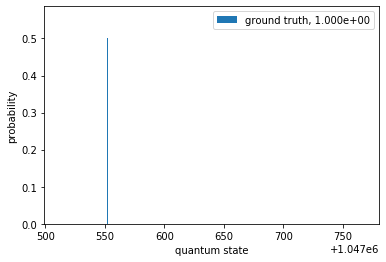

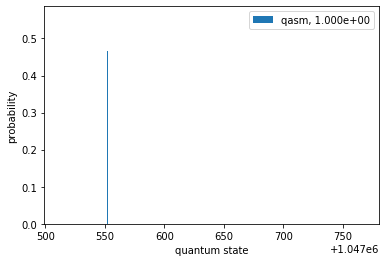

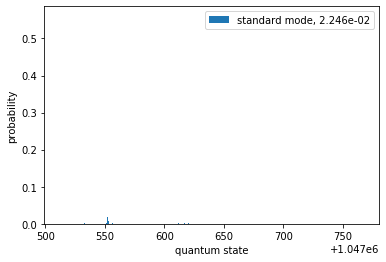

In [30]:
plot_range = min(256,len(d1))
start_idx = 1047512
x = np.arange(len(d1))[start_idx:start_idx+plot_range]
y_lim = 0
for d in [d1,d2,d3]:
    y_lim = max(y_lim,max(d))
y_lim *= 1.1

plt.figure()
plt.bar(x,height=d1[start_idx:start_idx+plot_range],label='ground truth, %.3e'%fidelity(d1,d1))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()

plt.figure()
plt.bar(x,height=d2[start_idx:start_idx+plot_range],label='qasm, %.3e'%fidelity(d1,d2))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()

plt.figure()
plt.bar(x,height=d3[start_idx:start_idx+plot_range],label='standard mode, %.3e'%fidelity(d1,d3))
plt.ylim(0,y_lim)
plt.xlabel('quantum state')
plt.ylabel('probability')
plt.legend()
plt.show()

In [22]:
d1.sort()
print(d1[-2])

0.4999999999999999
